# Salary Prediction

In [1]:
import numpy as np 
import pandas as pd 
import pickle

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [3]:
# ! pip install plotly

In [4]:
# df1=pd.read_csv('/kaggle/input/jobs-dataset-from-glassdoor/eda_data.csv')
# df2=pd.read_csv('/kaggle/input/jobs-dataset-from-glassdoor/glassdoor_jobs.csv')
# print("")
df3=pd.read_csv('./data/salary_data_cleaned.csv')

In [5]:
# print('eda dataset')
# df1.head(10)

In [6]:
# print("glassdor_jobs")
# df2.head(10)

In [7]:
print('cleaned salary dataset')
df3.head()

cleaned salary dataset


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [8]:
job_title=df3['Job Title'].unique()
job_title_tuple=tuple(job_title)
job_title_tuple

('Data Scientist',
 'Healthcare Data Scientist',
 'Research Scientist',
 'Staff Data Scientist - Technology',
 'Data Analyst',
 'Data Engineer I',
 'Scientist I/II, Biology',
 'Customer Data Scientist',
 'Data Scientist - Health Data Analytics',
 'Senior Data Scientist / Machine Learning',
 'Data Scientist - Quantitative',
 'Digital Health Data Scientist',
 'Associate Data Analyst',
 'Clinical Data Scientist',
 'Data Scientist / Machine Learning Expert',
 'Web Data Analyst',
 'Senior Data Scientist',
 'Data Engineer',
 'Data Scientist - Algorithms & Inference',
 'Scientist',
 'Lead Data Scientist',
 'Spectral Scientist/Engineer',
 'College Hire - Data Scientist - Open to December 2019 Graduates',
 'Data Scientist, Office of Data Science',
 'Data Science Analyst',
 'Senior Risk Data Scientist',
 'Data Scientist in Artificial Intelligence Early Career',
 'Data Scientist - Research',
 'R&D Data Analysis Scientist',
 'Analytics Consultant',
 'Director, Data Science',
 'Data Scientist SR',


In [9]:
location=tuple(df3['Location'].unique())
location

('Albuquerque, NM',
 'Linthicum, MD',
 'Clearwater, FL',
 'Richland, WA',
 'New York, NY',
 'Dallas, TX',
 'Baltimore, MD',
 'San Jose, CA',
 'Rochester, NY',
 'Chantilly, VA',
 'Plano, TX',
 'Seattle, WA',
 'Cambridge, MA',
 'Newark, NJ',
 'Mountain View, CA',
 'San Francisco, CA',
 'Denver, CO',
 'Chicago, IL',
 'Louisville, KY',
 'Herndon, VA',
 'Hillsboro, OR',
 'Worcester, MA',
 'Groton, CT',
 'Detroit, MI',
 'Sunnyvale, CA',
 'Ipswich, MA',
 'Redlands, CA',
 'Woburn, MA',
 'Fremont, CA',
 'Long Beach, NY',
 'Marlborough, MA',
 'Allendale, NJ',
 'Washington, DC',
 'Bellevue, WA',
 'Longmont, CO',
 'Beavercreek, OH',
 'Peoria, IL',
 'Fort Lauderdale, FL',
 'Boston, MA',
 'Huntsville, AL',
 'Armonk, NY',
 'San Diego, CA',
 'Saint Louis, MO',
 'Cincinnati, OH',
 'Palo Alto, CA',
 'Coraopolis, PA',
 'Framingham, MA',
 'Atlanta, GA',
 'Philadelphia, PA',
 'Vancouver, WA',
 'Indianapolis, IN',
 'Lake Forest, IL',
 'Maryland Heights, MO',
 'Charlottesville, VA',
 'Pittsburgh, PA',
 'Harr

In [10]:
ownership=tuple(df3['Type of ownership'].unique())
ownership

('Company - Private',
 'Other Organization',
 'Government',
 'Company - Public',
 'Hospital',
 'Subsidiary or Business Segment',
 'Nonprofit Organization',
 'Unknown',
 'College / University',
 'School / School District',
 '-1')

In [11]:
industry=tuple(df3['Industry'].unique())
industry

('Aerospace & Defense',
 'Health Care Services & Hospitals',
 'Security Services',
 'Energy',
 'Advertising & Marketing',
 'Real Estate',
 'Banks & Credit Unions',
 'Consulting',
 'Internet',
 'Other Retail Stores',
 'Research & Development',
 'Department, Clothing, & Shoe Stores',
 'Biotech & Pharmaceuticals',
 'Motion Picture Production & Distribution',
 'Enterprise Software & Network Solutions',
 'Insurance Carriers',
 'Insurance Agencies & Brokerages',
 'Logistics & Supply Chain',
 'Telecommunications Services',
 'IT Services',
 'Computer Hardware & Software',
 '-1',
 'Consumer Products Manufacturing',
 'Industrial Manufacturing',
 'Metals Brokers',
 'Financial Transaction Processing',
 'Sporting Goods Stores',
 'Staffing & Outsourcing',
 'Wholesale',
 'Mining',
 'Financial Analytics & Research',
 'Federal Agencies',
 'Education Training Services',
 'Transportation Equipment Manufacturing',
 'Farm Support Services',
 'TV Broadcast & Cable Networks',
 'Architectural & Engineering Se

In [12]:
sector=tuple(df3['Sector'].unique())
sector

('Aerospace & Defense',
 'Health Care',
 'Business Services',
 'Oil, Gas, Energy & Utilities',
 'Real Estate',
 'Finance',
 'Information Technology',
 'Retail',
 'Biotech & Pharmaceuticals',
 'Media',
 'Insurance',
 'Transportation & Logistics',
 'Telecommunications',
 '-1',
 'Manufacturing',
 'Mining & Metals',
 'Government',
 'Education',
 'Agriculture & Forestry',
 'Travel & Tourism',
 'Non-Profit',
 'Arts, Entertainment & Recreation',
 'Construction, Repair & Maintenance',
 'Accounting & Legal',
 'Consumer Services')

In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

In [14]:
# df1.shape

In [15]:
# df2.shape

In [16]:
df3.shape

(742, 28)

In [17]:
df3.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
hourly               0
employer_provided    0
min_salary           0
max_salary           0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
dtype: int64

***cleaned dataset***

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

In [19]:
df3.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [20]:
selected_features=['Job Title','Rating','Company Name', 'Location', 'avg_salary', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 
                   'python_yn', 'R_yn', 'spark', 'aws', 'excel']

X_cols = ['Job Title','Rating','Company Name', 'Location', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel']
y_cols = ['avg_salary']

dataframe with selected features 

In [21]:
df=df3[selected_features]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Rating             742 non-null    float64
 2   Company Name       742 non-null    object 
 3   Location           742 non-null    object 
 4   avg_salary         742 non-null    float64
 5   Size               742 non-null    object 
 6   Type of ownership  742 non-null    object 
 7   Industry           742 non-null    object 
 8   Sector             742 non-null    object 
 9   Revenue            742 non-null    object 
 10  python_yn          742 non-null    int64  
 11  R_yn               742 non-null    int64  
 12  spark              742 non-null    int64  
 13  aws                742 non-null    int64  
 14  excel              742 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 87.1+ KB


In [23]:
df.head(10)

,Job Title,Rating,Company Name,Location,avg_salary,Size,Type of ownership,Industry,Sector,Revenue,python_yn,R_yn,spark,aws,excel
0,Data Scientist,3.8,Tecolote Research\n3.8,"Albuquerque, NM",72.0,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),1,0,0,0,1
1,Healthcare Data Scientist,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD",87.5,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),1,0,0,0,0
2,Data Scientist,4.8,KnowBe4\n4.8,"Clearwater, FL",85.0,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),1,0,1,0,1
3,Data Scientist,3.8,PNNL\n3.8,"Richland, WA",76.5,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),1,0,0,0,0
4,Data Scientist,2.9,Affinity Solutions\n2.9,"New York, NY",114.5,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,1,0,0,0,1
5,Data Scientist,3.4,CyrusOne\n3.4,"Dallas, TX",95.0,201 to 500 employees,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),1,0,0,1,1
6,Data Scientist,4.1,ClearOne Advantage\n4.1,"Baltimore, MD",73.5,501 to 1000 employees,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,0,0,0,0,1
7,Data Scientist,3.8,Logic20/20\n3.8,"San Jose, CA",114.0,201 to 500 employees,Company - Private,Consulting,Business Services,$25 to $50 million (USD),1,0,1,1,1
8,Research Scientist,3.3,Rochester Regional Health\n3.3,"Rochester, NY",61.0,10000+ employees,Hospital,Health Care Services & Hospitals,Health Care,$500 million to $1 billion (USD),0,0,0,0,0
9,Data Scientist,4.6,<intent>\n4.6,"New York, NY",140.0,51 to 200 employees,Company - Private,Internet,Information Technology,$100 to $500 million (USD),1,0,1,0,0


In [24]:
df.shape

(742, 15)

# DATA VISUALIZATION 

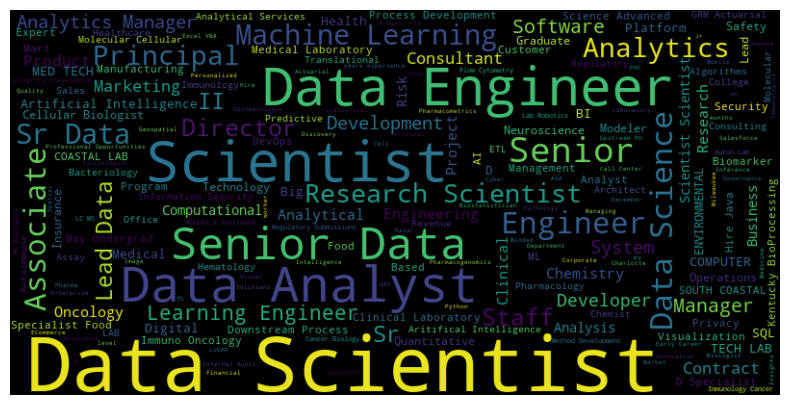

In [25]:
plotdata=" ".join(df['Job Title'])
wc = WordCloud(width=800, height=400, background_color='black').generate(plotdata)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

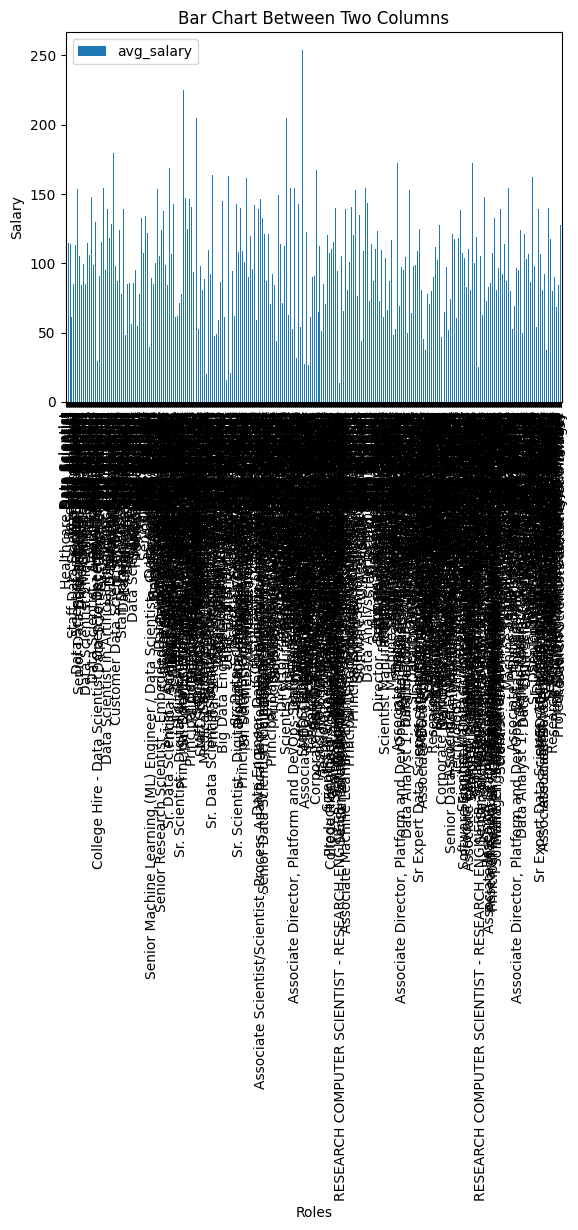

In [26]:
df.plot(x='Job Title', y='avg_salary', kind='bar')
plt.xlabel('Roles')
plt.ylabel('Salary')
plt.title('Bar Chart Between Two Columns')
plt.show()

In [27]:
unique_val=df['Job Title'].unique()
print(unique_val)
print(len(unique_val))

['Data Scientist' 'Healthcare Data Scientist' 'Research Scientist'
 'Staff Data Scientist - Technology' 'Data Analyst' 'Data Engineer I'
 'Scientist I/II, Biology' 'Customer Data Scientist'
 'Data Scientist - Health Data Analytics'
 'Senior Data Scientist / Machine Learning'
 'Data Scientist - Quantitative' 'Digital Health Data Scientist'
 'Associate Data Analyst' 'Clinical Data Scientist'
 'Data Scientist / Machine Learning Expert' 'Web Data Analyst'
 'Senior Data Scientist' 'Data Engineer'
 'Data Scientist - Algorithms & Inference' 'Scientist'
 'Lead Data Scientist' 'Spectral Scientist/Engineer'
 'College Hire - Data Scientist - Open to December 2019 Graduates'
 'Data Scientist, Office of Data Science' 'Data Science Analyst'
 'Senior Risk Data Scientist'
 'Data Scientist in Artificial Intelligence Early Career'
 'Data Scientist - Research' 'R&D Data Analysis Scientist'
 'Analytics Consultant' 'Director, Data Science' 'Data Scientist SR'
 'R&D Sr Data Scientist' 'Customer Data Scienti

In [28]:
job_roles = df['Job Title'].value_counts()
# Create a bar chart using Plotly Express
fig = px.bar(y=job_roles.values, 
             x=job_roles.index, 
             color = job_roles.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=job_roles.values,
             title= 'Job roles distribution',
             template= 'plotly_dark',
             width=750, height=500)
# Update the layout of the chart to set the axis titles and font size
fig.update_layout(
    xaxis_title="Job Titles",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
# Show the chart
fig.show()

based on rating , creating a sub dataframe to visulise the data 


In [29]:
filtered_df=df[df['Rating']==5]

In [30]:
filtered_df.head()

,Job Title,Rating,Company Name,Location,avg_salary,Size,Type of ownership,Industry,Sector,Revenue,python_yn,R_yn,spark,aws,excel
45,Data Scientist,5.0,BPA Services\n5.0,"Washington, DC",155.0,Unknown,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,0,0,0,1,1
138,Data Engineer,5.0,Gridiron IT\n5.0,"Tampa, FL",132.5,51 to 200 employees,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,0,0,0,0,0
373,Data Scientist,5.0,BPA Services\n5.0,"Washington, DC",155.0,Unknown,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,0,0,0,1,1
424,Data Scientist,5.0,Royce Geospatial\n5.0,"Springfield, VA",101.0,51 to 200 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$10 to $25 million (USD),1,0,0,0,0
693,Senior Data Scientist,5.0,SkySync\n5.0,"Ann Arbor, MI",130.0,51 to 200 employees,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,0,0,0,0,1


In [31]:
filtered_df.shape

(5, 15)

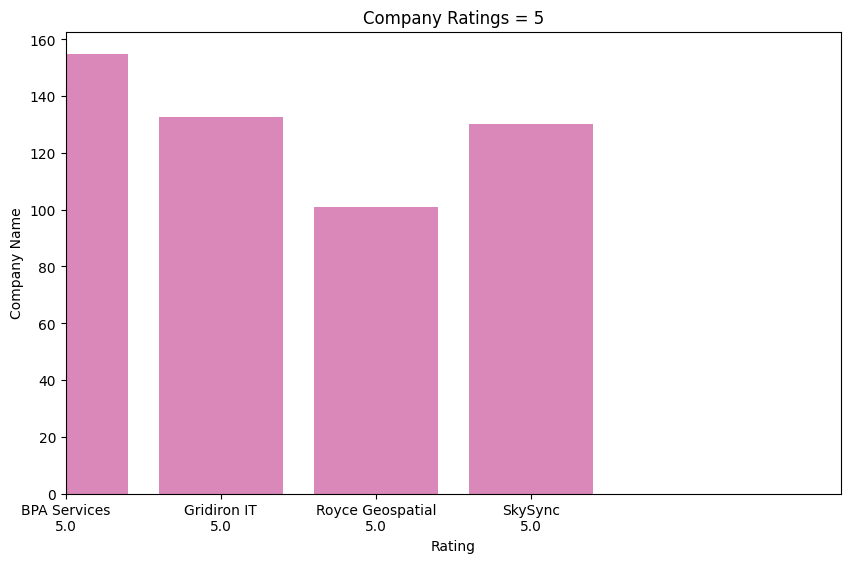

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(filtered_df['Company Name'], filtered_df['avg_salary'], color='#D988B9')
plt.xlabel('Rating')
plt.ylabel('Company Name')
plt.title('Company Ratings = 5')
plt.xlim(0, 5)  # Set an appropriate range for the x-axis
plt.show()

In [33]:
filtered_df2=df[df['Rating']>4]
filtered_df2.shape

(172, 15)

In [34]:
roles=filtered_df2['Job Title'].value_counts().reset_index()
roles.columns=['Job Title','Frequency']


In [35]:
roles

,Job Title,Frequency
0,Data Scientist,41
1,Senior Data Scientist,18
2,Data Engineer,13
3,Senior Data Engineer,6
4,Data Analyst,4
...,...,...
62,Data & Analytics Consultant (NYC),1
63,Big Data Engineer - Chicago - Future Opportunity,1
64,Survey Data Analyst,1
65,Data Management Specialist,1


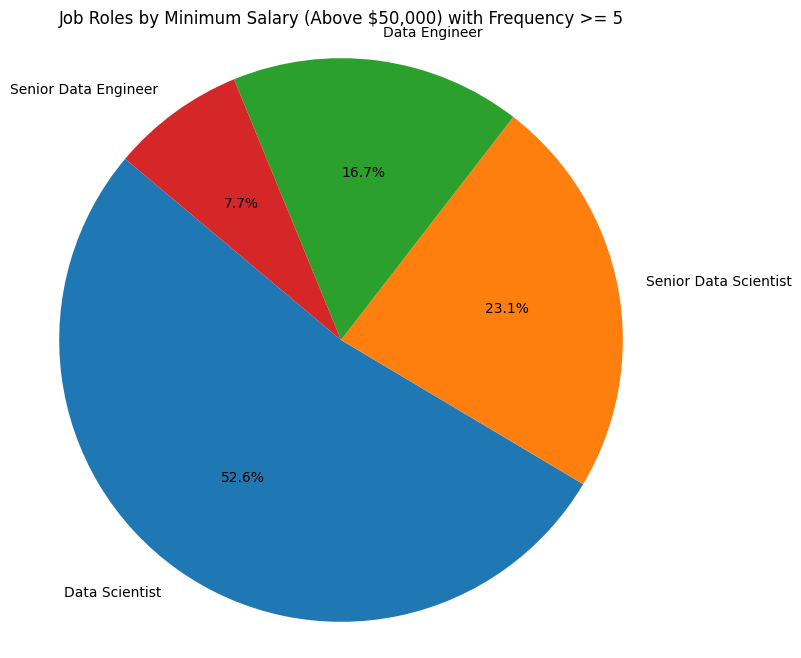

In [36]:
df2=roles[roles['Frequency']>5]
plt.figure(figsize=(8, 8))
plt.pie(df2['Frequency'], labels=df2['Job Title'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')

plt.title(f'Job Roles by Minimum Salary (Above $50,000) with Frequency >= 5')
plt.show()

In [37]:
selected_roles=df2.columns[0]
selected_roles=df2['Job Title']

In [38]:
stacked_chart=df[df['Job Title'].isin(selected_roles)]
stacked_chart

,Job Title,Rating,Company Name,Location,avg_salary,Size,Type of ownership,Industry,Sector,Revenue,python_yn,R_yn,spark,aws,excel
0,Data Scientist,3.8,Tecolote Research\n3.8,"Albuquerque, NM",72.0,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),1,0,0,0,1
2,Data Scientist,4.8,KnowBe4\n4.8,"Clearwater, FL",85.0,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),1,0,1,0,1
3,Data Scientist,3.8,PNNL\n3.8,"Richland, WA",76.5,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),1,0,0,0,0
4,Data Scientist,2.9,Affinity Solutions\n2.9,"New York, NY",114.5,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,1,0,0,0,1
5,Data Scientist,3.4,CyrusOne\n3.4,"Dallas, TX",95.0,201 to 500 employees,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,Data Engineer,3.4,MetroStar Systems\n3.4,"Rockville, MD",109.0,201 to 500 employees,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),0,0,0,1,0
707,Senior Data Scientist,4.4,MathWorks\n4.4,"Natick, MA",139.5,1001 to 5000 employees,Company - Private,Computer Hardware & Software,Information Technology,$1 to $2 billion (USD),1,0,0,0,0
714,Data Scientist,3.2,"Numeric, LLC\n3.2","Philadelphia, PA",128.5,1 to 50 employees,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),1,0,1,1,0
735,Data Engineer,3.9,Fivestars\n3.9,"San Francisco, CA",87.5,201 to 500 employees,Company - Private,Internet,Information Technology,$100 to $500 million (USD),1,0,0,1,1


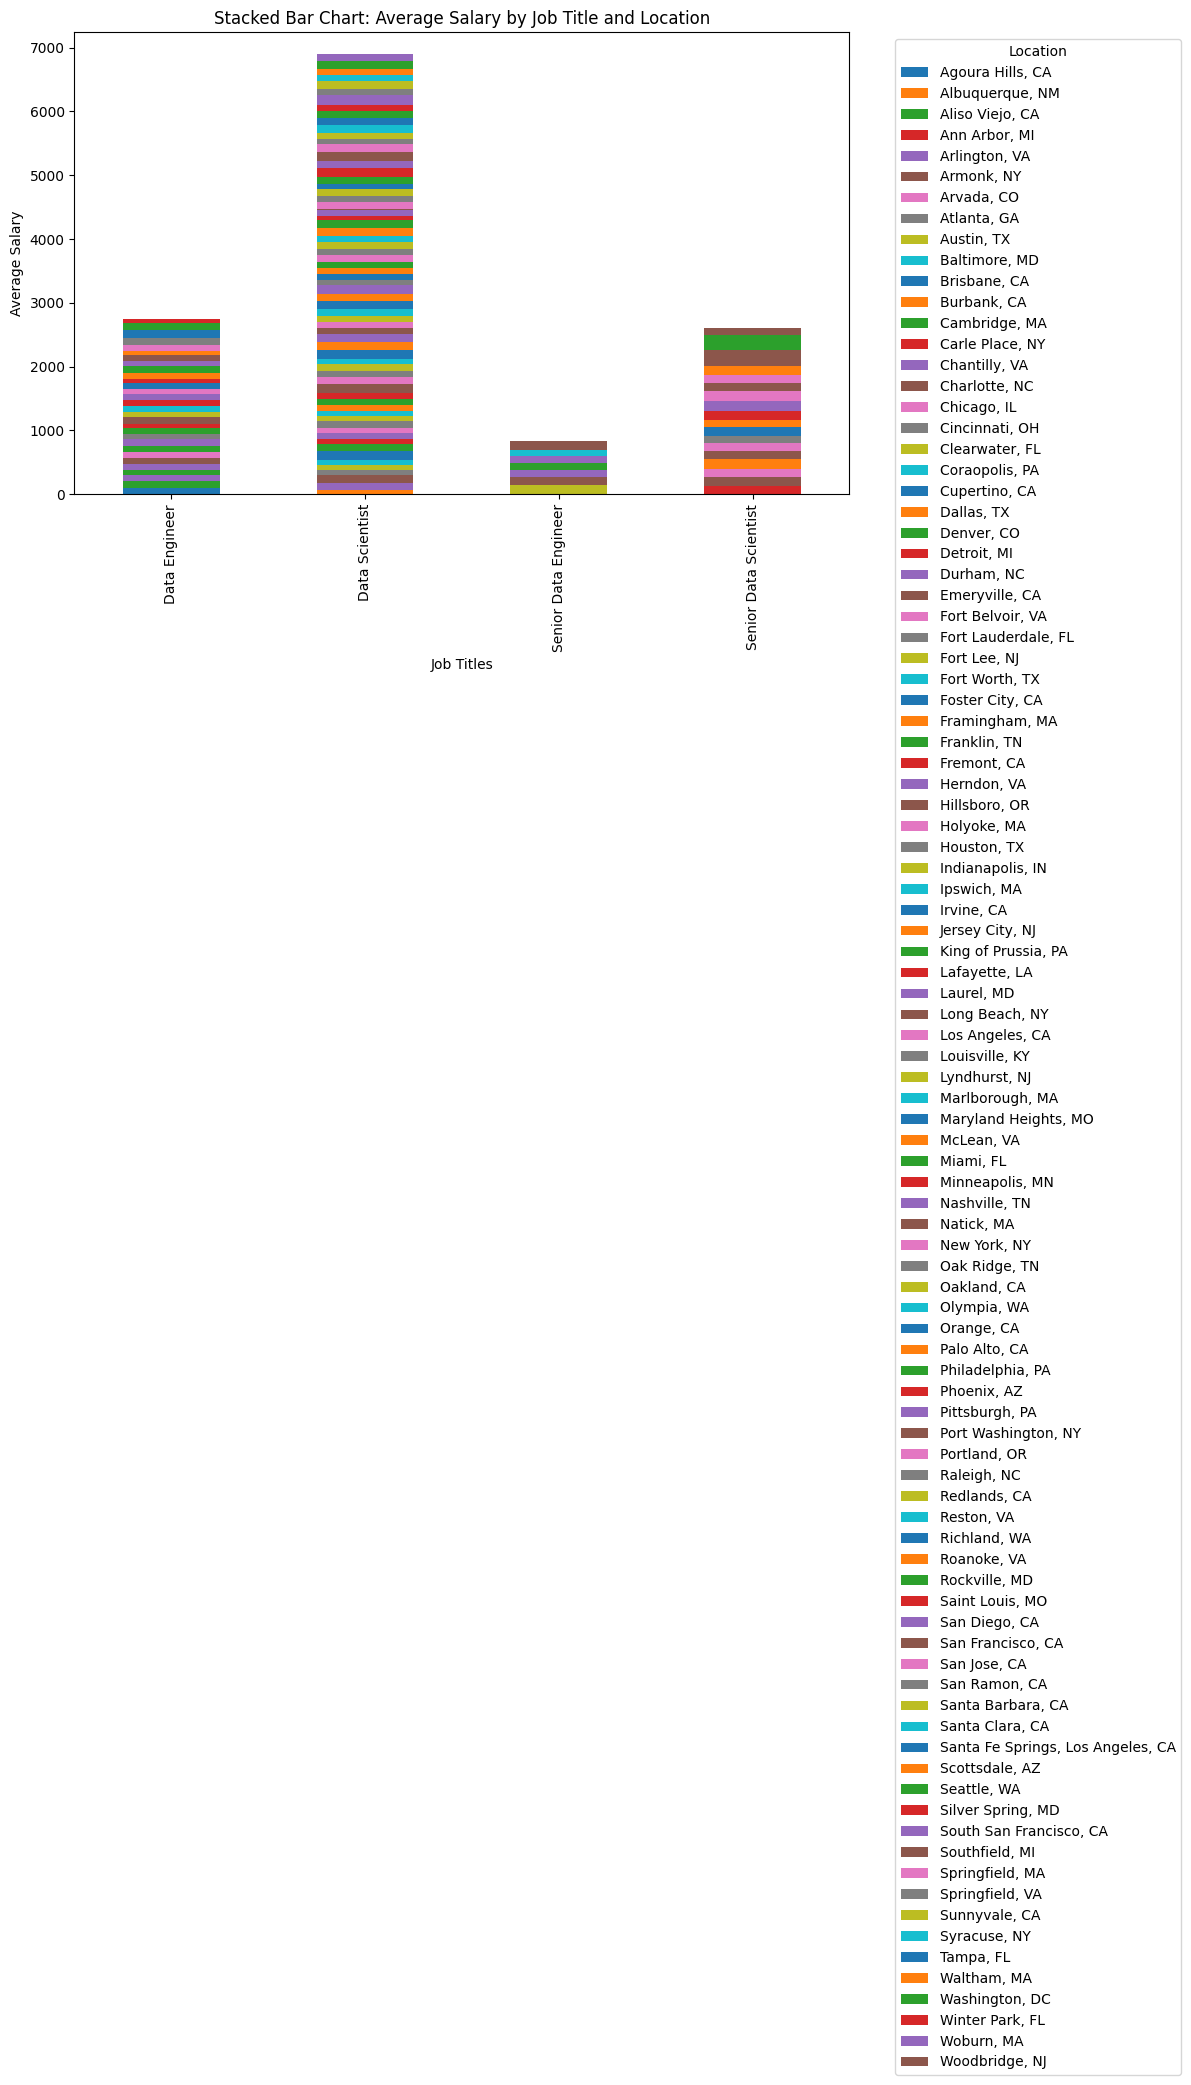

In [39]:

pivot_df = stacked_chart.pivot_table(index='Job Title', columns='Location', values='avg_salary')

# Create the stacked bar chart
ax=pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Job Titles')
plt.ylabel('Average Salary')
plt.title('Stacked Bar Chart: Average Salary by Job Title and Location')
#plt.legend(title='Location', loc='upper right')
ax.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [40]:
location_frequency = stacked_chart.groupby('Job Title')['Location'].value_counts().unstack(fill_value=0)
location_frequency

Location,"Agoura Hills, CA","Albuquerque, NM","Aliso Viejo, CA","Ann Arbor, MI","Arlington, VA","Armonk, NY","Arvada, CO","Atlanta, GA","Austin, TX","Baltimore, MD",...,"Springfield, MA","Springfield, VA","Sunnyvale, CA","Syracuse, NY","Tampa, FL","Waltham, MA","Washington, DC","Winter Park, FL","Woburn, MA","Woodbridge, NJ"
Job Title,,,,,,,,,,,,,,,,,,,,,
Data Engineer,1,0,2,0,1,0,0,0,0,0,...,2,1,0,0,1,0,2,2,0,0
Data Scientist,0,3,0,0,1,2,0,2,1,2,...,0,2,2,1,0,1,4,0,1,0
Senior Data Engineer,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
Senior Data Scientist,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,2


In [41]:
# Calculate the frequency of each location
location_counts = df['Location'].value_counts()
location_counts

New York, NY                         55
San Francisco, CA                    49
Cambridge, MA                        47
Chicago, IL                          32
Boston, MA                           23
                                     ..
Santa Fe Springs, Los Angeles, CA     1
Kansas City, MO                       1
Columbia, SC                          1
Red Bank, NJ                          1
Olympia, WA                           1
Name: Location, Length: 200, dtype: int64

In [42]:
# Filter for the most common locations (e.g., top 5)
top_locations = location_counts.head(20)
top_locations

New York, NY               55
San Francisco, CA          49
Cambridge, MA              47
Chicago, IL                32
Boston, MA                 23
San Jose, CA               13
Pittsburgh, PA             12
Washington, DC             11
Rockville, MD              11
Winston-Salem, NC          10
Richland, WA               10
Herndon, VA                10
Indianapolis, IN            9
San Diego, CA               9
Mountain View, CA           8
Austin, TX                  8
South San Francisco, CA     8
Rochester, NY               7
Palo Alto, CA               7
Salt Lake City, UT          6
Name: Location, dtype: int64

In [43]:
Rating = df['Rating'].value_counts()
# Create a bar chart with x-axis as unique values in Rating column, y-axis as their count, 
# and color of the bars based on the unique values
fig = px.bar(y=Rating.values, 
             x=Rating.index, 
             color = Rating.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=Rating.values,
             title= 'Rating distribution',
             template= 'plotly_dark',
             width=750, height=500)
# Set the x-axis label as 'Rating', y-axis label as 'count', and font family and size
fig.update_layout(
    xaxis_title="Rating",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
# Show the chart
fig.show()

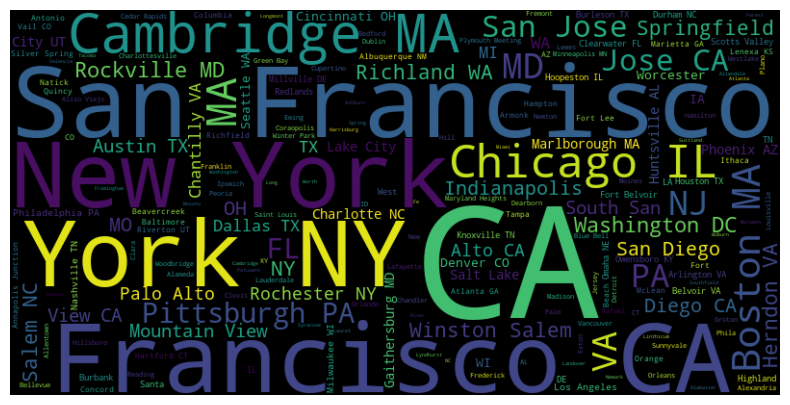

In [44]:
plotdata=" ".join(df['Location'])
wc = WordCloud(width=800, height=400, background_color='black').generate(plotdata)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

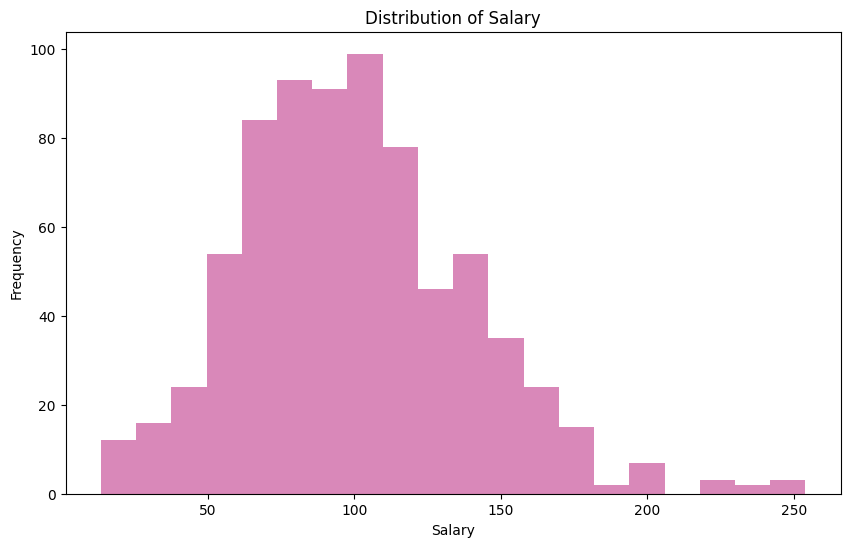

In [45]:
# use pyplot to plot out the distributions of the avg_salary column of df
plt.figure(figsize=(10, 6))
plt.hist(df['avg_salary'], bins=20, color='#D988B9')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salary')
plt.show()

<Axes: >

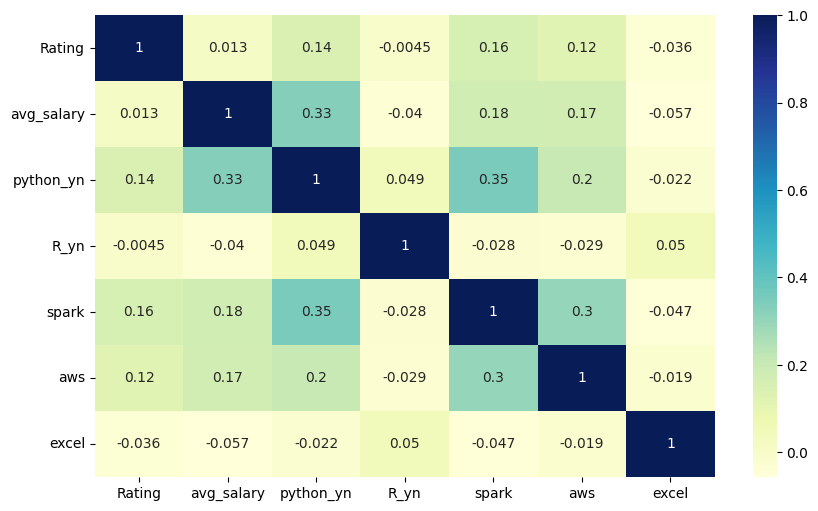

In [46]:
import seaborn as sns
# plot the heatmap of df
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

# ML

In [47]:
df.head()

,Job Title,Rating,Company Name,Location,avg_salary,Size,Type of ownership,Industry,Sector,Revenue,python_yn,R_yn,spark,aws,excel
0,Data Scientist,3.8,Tecolote Research\n3.8,"Albuquerque, NM",72.0,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),1,0,0,0,1
1,Healthcare Data Scientist,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD",87.5,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),1,0,0,0,0
2,Data Scientist,4.8,KnowBe4\n4.8,"Clearwater, FL",85.0,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),1,0,1,0,1
3,Data Scientist,3.8,PNNL\n3.8,"Richland, WA",76.5,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),1,0,0,0,0
4,Data Scientist,2.9,Affinity Solutions\n2.9,"New York, NY",114.5,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,1,0,0,0,1


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [49]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Rating             742 non-null    float64
 2   Company Name       742 non-null    object 
 3   Location           742 non-null    object 
 4   avg_salary         742 non-null    float64
 5   Size               742 non-null    object 
 6   Type of ownership  742 non-null    object 
 7   Industry           742 non-null    object 
 8   Sector             742 non-null    object 
 9   Revenue            742 non-null    object 
 10  python_yn          742 non-null    int64  
 11  R_yn               742 non-null    int64  
 12  spark              742 non-null    int64  
 13  aws                742 non-null    int64  
 14  excel              742 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 87.1+ KB


In [50]:
df.columns

Index(['Job Title', 'Rating', 'Company Name', 'Location', 'avg_salary', 'Size',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'python_yn',
       'R_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [51]:
columns_to_encode = ['Job Title', 'Company Name', 'Location', 'Size',
       'Type of ownership', 'Industry', 'Sector', 'Revenue']

le = LabelEncoder()
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])
    print('Label encoding complete.')

Label encoding complete.
Label encoding complete.
Label encoding complete.
Label encoding complete.
Label encoding complete.
Label encoding complete.
Label encoding complete.
Label encoding complete.


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    int32  
 1   Rating             742 non-null    float64
 2   Company Name       742 non-null    int32  
 3   Location           742 non-null    int32  
 4   avg_salary         742 non-null    float64
 5   Size               742 non-null    int32  
 6   Type of ownership  742 non-null    int32  
 7   Industry           742 non-null    int32  
 8   Sector             742 non-null    int32  
 9   Revenue            742 non-null    int32  
 10  python_yn          742 non-null    int64  
 11  R_yn               742 non-null    int64  
 12  spark              742 non-null    int64  
 13  aws                742 non-null    int64  
 14  excel              742 non-null    int64  
dtypes: float64(2), int32(8), int64(5)
memory usage: 63.9 KB


In [53]:
X = df.drop('avg_salary', axis=1)
y = df['avg_salary']

In [54]:
# df['Job Title'].unique()

In [55]:
print(X.shape, y.shape)

(742, 14) (742,)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, X_test.shape)

(593, 14) (149, 14)


In [57]:
print(X_test.columns)
X_test.head()

Index(['Job Title', 'Rating', 'Company Name', 'Location', 'Size',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'python_yn',
       'R_yn', 'spark', 'aws', 'excel'],
      dtype='object')


,Job Title,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Revenue,python_yn,R_yn,spark,aws,excel
629,231,2.1,319,24,3,7,8,5,4,0,0,0,0,1
151,225,4.4,162,85,7,2,13,6,13,1,0,1,1,0
692,113,3.2,177,111,5,6,21,11,0,1,0,1,0,1
267,51,3.2,222,0,3,3,37,10,10,1,0,0,1,1
682,30,3.7,322,186,6,5,28,12,4,0,0,0,0,0


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import sklearn.metrics as metrics

**Linear Regression Model**

In [59]:
lr = LinearRegression()
lr.fit(X_train, y_train) 
y_pred = lr.predict(X_test)

In [60]:
# y_pred

In [61]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 26.810010909800745
Root Mean Squared Error: 34.443722646452464


In [ ]:
directory = "models/"

In [62]:
filename = 'linear_reg_model.sav'
pickle.dump(lr, open(directory + filename, 'wb'))

**SVR Model**

In [63]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 29.7013341617969
Root Mean Squared Error: 37.724000832456554


In [64]:
filename = 'svr_model.sav'
pickle.dump(svr, open(directory + filename, 'wb'))

**KNN Model**

In [65]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 26.75302013422819
Root Mean Squared Error: 35.712874372880634


In [66]:
# Storing the KNN Model
filename = 'knn_model.sav'
pickle.dump(knn, open(directory + filename, 'wb'))

# Trying the model Pickle file

In [67]:
import pickle

In [68]:
loaded_model=pickle.load(open(filename,'rb'))

the loaded_model now contains the model that we trained 

In [69]:
input_data=(225,4.4,162,85,7,2,13,6,13,1,0,1,1,0)

In [70]:
input_np=np.asarray(input_data)
input_np

array([225. ,   4.4, 162. ,  85. ,   7. ,   2. ,  13. ,   6. ,  13. ,
         1. ,   0. ,   1. ,   1. ,   0. ])

In [71]:
predict=loaded_model.predict([input_np])

In [72]:
predict

array([116.4])